# HMM_ConstructExampleDatasets

Create sample time series data for a two-hidden-state per two-observable-state Hidden Markov Model.

In [99]:
# import relevant packages
import numpy as np
import sklearn as skl
import matplotlib as mpl
from matplotlib import pyplot as plt

from hmmlearn import hmm

# Example from Documentation

In [100]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))
print(covars)
# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars


[[[ 0.5  0. ]
  [ 0.   0.5]]

 [[ 0.5  0. ]
  [ 0.   0.5]]

 [[ 0.5  0. ]
  [ 0.   0.5]]

 [[ 0.5  0. ]
  [ 0.   0.5]]]


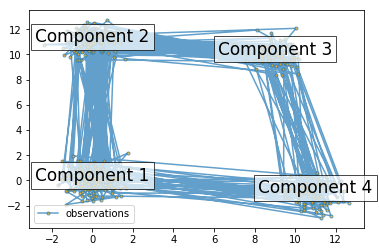

In [101]:
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

# Example 1 - two hidden states, single continuous emission

In [108]:
# start with a two component (state) model
modelEx1 = hmm.GaussianHMM(n_components=2)

# set up probability of starting in each state
modelEx1.startprob_ = np.array([1.0,0.0])

# set up transition probilities between states - each row should sum to 1
modelEx1.transmat_ = np.array([[0.1,0.9],[0.1,0.9]])

# set up emission distributions 
# GaussianHMM assumes Gaussian emissions
# set up mean and covariance for each distribution

# single dimension emission
modelEx1.means_ = np.array([[1.0],[20.0]])
modelEx1.covars_ = np.array([[1.0],[1.0]])


0
[ 1.54844607]


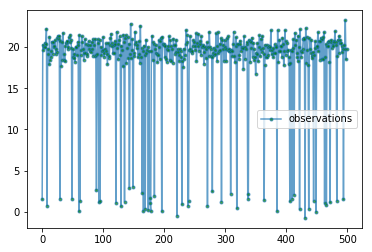

In [103]:
# Generate sample
XEx1, ZEx1 = modelEx1.sample(500)

# print first state and observation
print(ZEx1[0])
print(XEx1[0])

# Plot the sampled data
plt.plot(XEx1[:,0], ".-", label="observations", ms=6,
         mfc="green", alpha=0.7)

# Indicate the component numbers
plt.legend(loc='best')
plt.show()

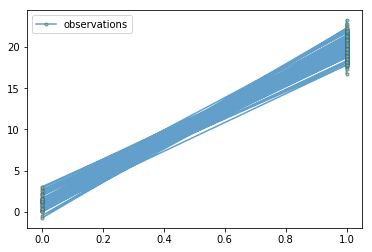

In [105]:
# Plot sampled data against their state
plt.plot(ZEx1[:],XEx1[:], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)
plt.legend()
plt.show()

# Example 2 - two hidden states, three discrete emissions

In [95]:
# start with a two component (state) model, with two discrete emissions
modelEx2 = hmm.MultinomialHMM(n_components=2)

# set up probability of starting in each state
modelEx2.startprob_ = np.array([1.0,0.0])

# set up transition probilities between states - each row should sum to 1
modelEx2.transmat_ = np.array([[0.1,0.9],[0.1,0.9]])

# set up emission probabilities
# MultinomialHMM assumes discrete emissions
# set up emission probabilities for each state

# single dimension emission
modelEx2.emissionprob_ = np.array([[0.5,0.5,0],[0,0.5,0.5]])

0
[1]


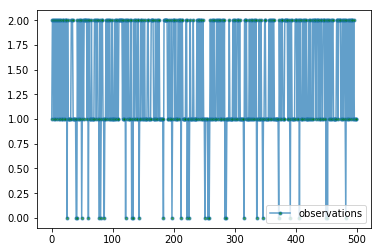

In [96]:
# Generate sample
XEx2, ZEx2 = modelEx2.sample(500)

# print first state and observation
print(ZEx2[0])
print(XEx2[0])

# Plot the sampled data
plt.plot(XEx2[:,0], ".-", label="observations", ms=6,
         mfc="green", alpha=0.7)

# Indicate the component numbers
plt.legend(loc='best')
plt.show()

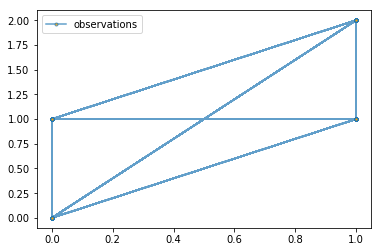

In [98]:
# Plot sampled data against their state
plt.plot(ZEx2[:],XEx2[:], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)
plt.legend()
plt.show()

# Example 3 - two hidden states, one continuous observation, mixed gaussian

In [120]:
# start with a two component (state) model, with two discrete emissions
modelEx3 = hmm.GMMHMM(n_components=2)

# set up probability of starting in each state
modelEx3.startprob_ = np.array([1.0,0.0])

# set up transition probilities between states - each row should sum to 1
modelEx3.transmat_ = np.array([[0.1,0.9],[0.1,0.9]])

# set up emission distributions 
# GMMHMM assumes Gaussian mixed model emissions
# set up mean and covariance for each distribution

# single dimension emission
modelEx3.weights_ = np.array([[0.1,0.9],[0.5,0.5]])
modelEx3.means_ = np.array([[1.0, 5.0],[20.0,30.0]])

# THIS NEEDS FIXED.
modelEx3.covars_ = np.array([[1.0, 1.0],[1.0, 1.0]])

In [121]:
# Generate sample
XEx3, ZEx3 = modelEx3.sample(500)

# print first state and observation
print(ZEx3[0])
print(XEx3[0])

# Plot the sampled data
plt.plot(XEx3[:,0], ".-", label="observations", ms=6,
         mfc="green", alpha=0.7)

# Indicate the component numbers
plt.legend(loc='best')
plt.show()

IndexError: tuple index out of range